In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scanpy.external as sce
import decoupler as dc
import scanorama

In [2]:
path_list = [r"C:\Users\thmet\Documents\outs 926983 hires", r"C:\Users\thmet\Documents\outs 926987 hires", r"C:\Users\thmet\Documents\outs 926991", r"C:\Users\thmet\Documents\outs 926895", r"C:\Users\thmet\Documents\outs 38032"]
names = ["926983", "926987", "926991", "926895", "38032"]
adatas = {}
for n, p in zip(names, path_list):
    adatas[n] = sc.read_visium(p)

C:\Users\thmet\miniconda3\envs\thomas\Lib\site-packages\anndata\_core\anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\thmet\miniconda3\envs\thomas\Lib\site-packages\anndata\_core\anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\thmet\miniconda3\envs\thomas\Lib\site-packages\anndata\_core\anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\thmet\miniconda3\envs\thomas\Lib\site-packages\anndata\_core\anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\thmet\miniconda3\envs\thomas\Lib\site-packages\anndata\_core\anndata.py:1908: UserWarning: Variable names are n

In [3]:
for n, adata in adatas.items():
    adata.var_names_make_unique()
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [4]:
path_list = [r"C:\Users\thmet\Documents\annotationsTMKS240416\Annotations_926983_240416.csv", r"C:\Users\thmet\Documents\annotationsTMKS240416\Annotations_926987_240416.csv", r"C:\Users\thmet\Documents\annotationsTMKS240416\Annotations_926991_240416.csv", r"C:\Users\thmet\Documents\annotationsTMKS240416\Annotations_926895_240416.csv", r"C:\Users\thmet\Documents\annotationsTMKS240416\Annotations_38032_240416.csv"]
names = ["926983", "926987", "926991", "926895", "38032"]
annos = {}
for n, p in zip(names, path_list):
    annos[n] = pd.read_csv(p)

In [5]:
anno_TM = {}
for n in names:
    anno_TM[n] = annos[n]["Annotations TM"]

In [6]:
for n, adata in adatas.items():
    adata.obs["anno_TM"]= pd.Categorical(anno_TM[n])

In [7]:
for n, adata in adatas.items():
    sc.pp.filter_cells(adata, min_counts=2000)
    adata = adata[adata.obs["pct_counts_mt"] < 20]
    print(f"#cells after MT filter: {adata.n_obs}")
    sc.pp.filter_genes(adata, min_cells=10)

#cells after MT filter: 2943


C:\Users\thmet\miniconda3\envs\thomas\Lib\site-packages\scanpy\preprocessing\_simple.py:283: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


#cells after MT filter: 2412


C:\Users\thmet\miniconda3\envs\thomas\Lib\site-packages\scanpy\preprocessing\_simple.py:283: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


#cells after MT filter: 3223


C:\Users\thmet\miniconda3\envs\thomas\Lib\site-packages\scanpy\preprocessing\_simple.py:283: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


#cells after MT filter: 2264


C:\Users\thmet\miniconda3\envs\thomas\Lib\site-packages\scanpy\preprocessing\_simple.py:283: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


#cells after MT filter: 3124


C:\Users\thmet\miniconda3\envs\thomas\Lib\site-packages\scanpy\preprocessing\_simple.py:283: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [8]:
adata_cc = sc.concat(adatas, label="dataset", uns_merge="unique", index_unique="-")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [9]:
df = pd.DataFrame(adata_cc.obs["total_counts"])
df['dataset'] = adata_cc.obs['dataset'].values
df['dataset'].replace("926983", "P1", inplace=True)
df['dataset'].replace("926987", "P2", inplace=True)
df['dataset'].replace("926991", "P3", inplace=True)
df['dataset'].replace("926895", "P4", inplace=True)
df['dataset'].replace("38032", "P5", inplace=True)

C:\Users\thmet\AppData\Local\Temp\ipykernel_21888\3268752759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='dataset', y='total_counts', split=False, inner=None, palette="tab10", alpha=0.8)


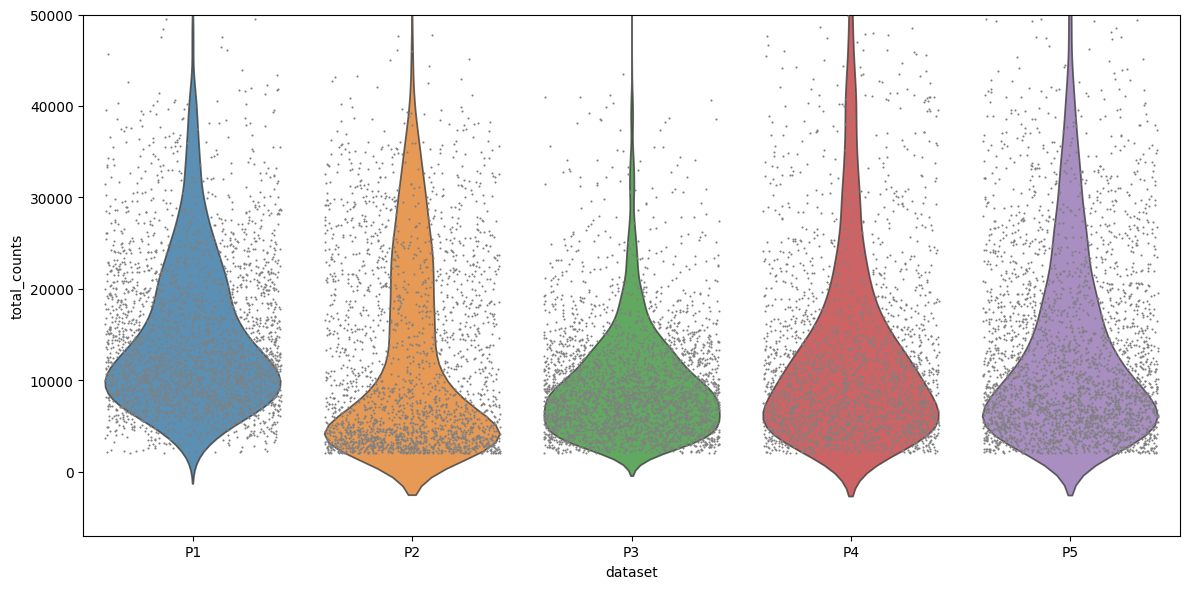

In [10]:
plt.figure(figsize=(12, 6))

sns.violinplot(data=df, x='dataset', y='total_counts', split=False, inner=None, palette="tab10", alpha=0.8)
sns.stripplot(data=df, x='dataset', y='total_counts', color="grey", dodge=False, jitter=0.4, size=1.5, alpha=1)
plt.ylim(-7000, 50000)

plt.tight_layout()
plt.savefig("quality_control_violin.tiff", format='tiff', dpi=300, bbox_inches='tight')
plt.savefig("quality_control_violin.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
adata_cc.layers["counts"] = adata_cc.X.copy()
sc.pp.normalize_total(adata_cc, inplace=True)
sc.pp.log1p(adata_cc)
adata_cc.layers["normalized"] = adata_cc.X.copy()
sc.pp.highly_variable_genes(adata_cc, flavor="seurat", n_top_genes=2000, batch_key="dataset")

In [12]:
sc.pp.pca(adata_cc)

In [13]:
sc.pp.neighbors(adata_cc)
sc.tl.umap(adata_cc)
sc.tl.leiden(adata_cc, key_added="clusters", resolution=0.8)



Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




C:\Users\thmet\AppData\Local\Temp\ipykernel_21888\2594085616.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_cc, key_added="clusters", resolution=0.8)


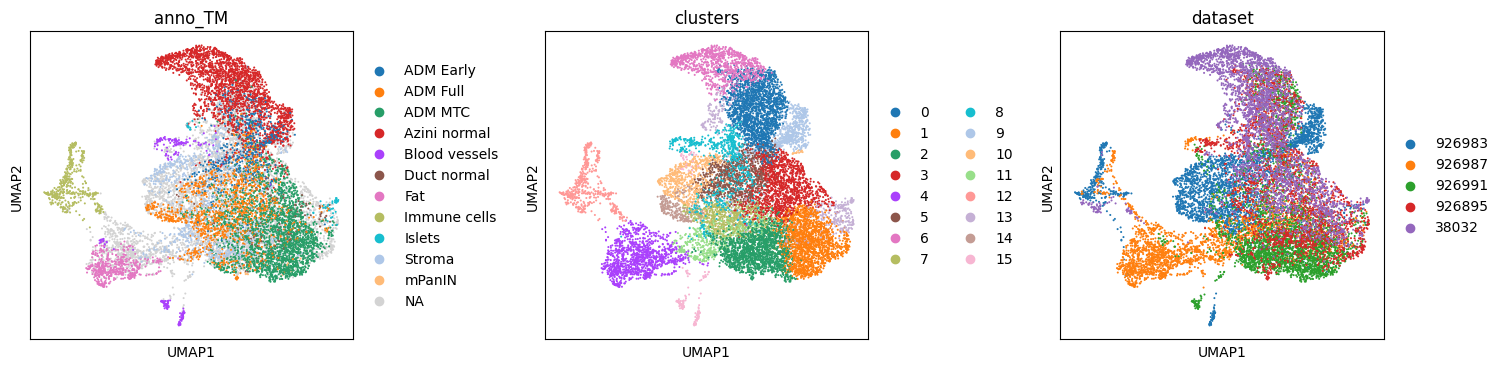

In [14]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_cc, color=["anno_TM", "clusters", "dataset"], wspace=0.45, save="umap_uncorrected_harm.pdf")

In [15]:
sce.pp.harmony_integrate(adata_cc, 'dataset')

2024-11-20 11:04:41,881 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-11-20 11:04:43,533 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-11-20 11:04:43,612 - harmonypy - INFO - Iteration 1 of 10
2024-11-20 11:04:47,051 - harmonypy - INFO - Iteration 2 of 10
2024-11-20 11:04:50,083 - harmonypy - INFO - Iteration 3 of 10
2024-11-20 11:04:53,236 - harmonypy - INFO - Iteration 4 of 10
2024-11-20 11:04:56,342 - harmonypy - INFO - Converged after 4 iterations


In [16]:
sc.pp.neighbors(adata_cc, use_rep="X_pca_harmony")
sc.tl.umap(adata_cc)
sc.tl.leiden(adata_cc, key_added="clusters", resolution=0.4) #resolution=0.78

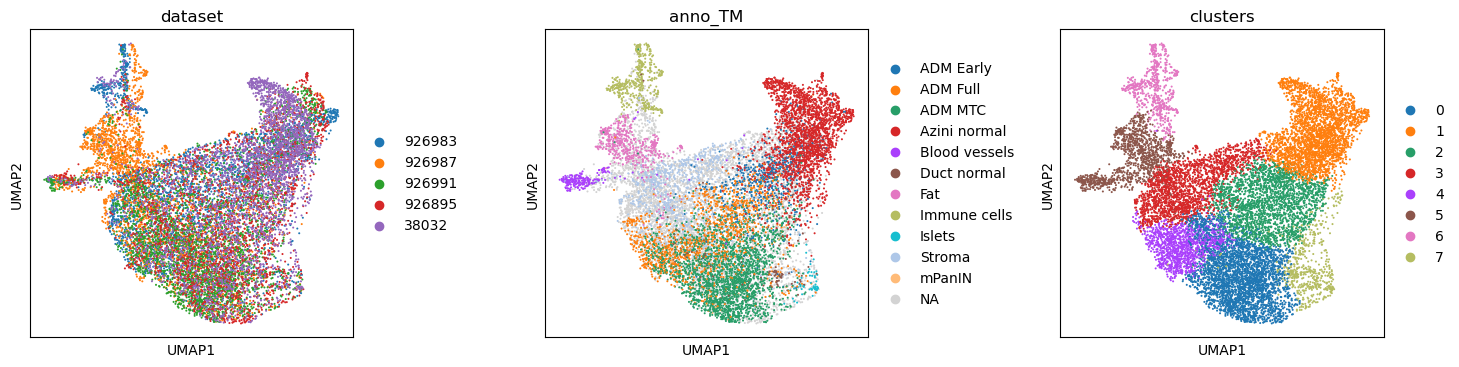

In [16]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_cc, color=["dataset", "anno_TM", "clusters"], wspace=0.45, save="umap_corrected_harm.pdf")

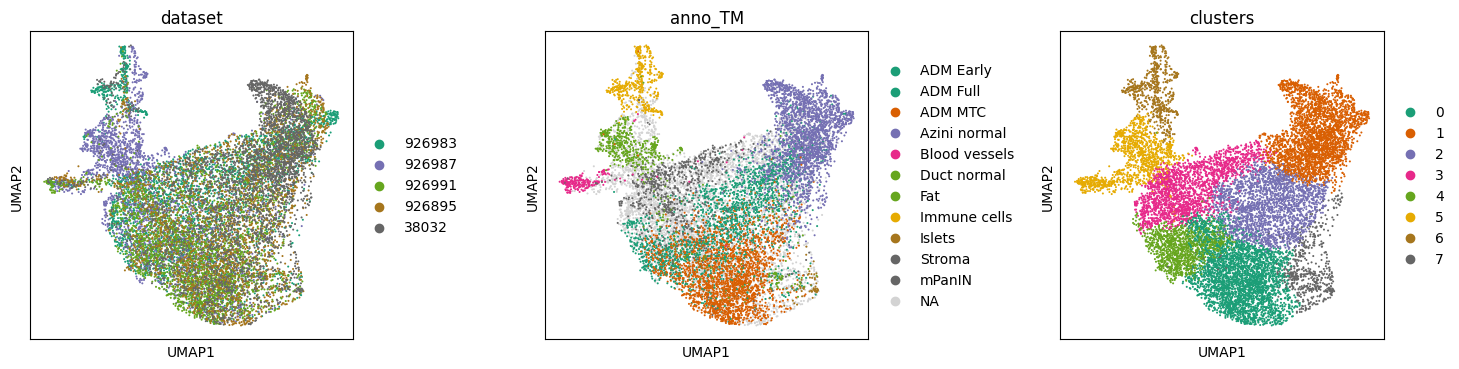

In [18]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_cc, color=["dataset", "anno_TM", "clusters"], wspace=0.45, save="umap_corrected_harm_2.pdf", palette="Dark2")

In [17]:
adata_cc.write("./results_harm.h5ad")

In [18]:
adata_cc.obs.to_csv("./results_clusters_anno_dataset_harm.csv", columns=["clusters", "anno_TM", "dataset"])

In [24]:
file = "./results_clusters_anno_dataset_harm.csv"

groupby = "anno_TM"
annotations = "clusters"

df = pd.read_csv(file, sep=",")
results = df.groupby(groupby)[annotations].value_counts(normalize=True, dropna=True) * 100
results = results[results > 5]
cumsum = results.groupby(level=groupby).cumsum()
index=cumsum.groupby(level=groupby).idxmax()
rest = 100 - cumsum.loc[index].reset_index(level=-1, drop=True)
rest=rest.reset_index()
rest.rename(columns={'clusters': 'proportion'}, inplace=True)
rest.insert(1, "clusters", ["Rest", "Rest", "Rest", "Rest", "Rest", "Rest", "Rest", "Rest", "Rest", "Rest", "Rest"])
results.name = "proportion"
results = results.to_frame()
results=results.reset_index()
results=pd.concat([results, rest])
results = pd.DataFrame(results).reset_index()
results = results.pivot(columns=annotations, values="proportion", index=groupby)
custom_order = ['Azini normal', 'ADM Early', 'ADM Full', 'ADM MTC', "mPanIN", "Duct normal", "Islets", 'Stroma', 'Fat', 'Immune cells', 'Blood vessels',]
results = results.reindex(custom_order)
results

clusters               0          1          2          3          4  \
anno_TM                                                                
Azini normal         NaN  88.869489   8.991707        NaN        NaN   
ADM Early            NaN  35.573770  57.049180        NaN        NaN   
ADM Full       18.721461        NaN  35.692542        NaN  36.301370   
ADM MTC        75.375774        NaN  12.113174        NaN  10.212202   
mPanIN         41.379310        NaN  34.482759        NaN  20.689655   
Duct normal    26.984127        NaN  12.698413        NaN  11.904762   
Islets               NaN        NaN        NaN        NaN        NaN   
Stroma         13.617021        NaN        NaN  71.205674        NaN   
Fat                  NaN        NaN        NaN   6.995885        NaN   
Immune cells         NaN        NaN        NaN        NaN        NaN   
Blood vessels        NaN        NaN        NaN        NaN        NaN   

clusters               5          6          7       Rest  
anno_TM                                                    
Azini normal         NaN        NaN        NaN   2.138804  
ADM Early            NaN        NaN        NaN   7.377049  
ADM Full             NaN        NaN        NaN   9.284627  
ADM MTC              NaN        NaN        NaN   2.298851  
mPanIN               NaN        NaN        NaN   3.448276  
Duct normal          NaN        NaN  42.063492   6.349206  
Islets               NaN        NaN  98.076923   1.923077  
Stroma               NaN        NaN        NaN  15.177305  
Fat            92.592593        NaN        NaN   0.411523  
Immune cells         NaN  99.556541        NaN   0.443459  
Blood vessels  95.217391        NaN        NaN   4.782609

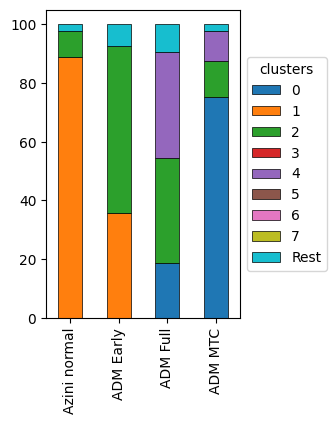

In [41]:
columns_to_plot = ["Azini normal", "ADM Early", "ADM Full", "ADM MTC"]
filtered_results = results.loc[columns_to_plot]

fig, ax = plt.subplots(1,1, figsize=(2.5, 4))
filtered_results.plot(kind="bar", stacked=True, ax=ax, edgecolor='black', linewidth=0.5, xlabel="", grid=False, color=([0.12156863, 0.46666667, 0.70588235, 1.        ],[1.         ,0.49803922 ,0.05490196 ,1.        ],[0.17254902, 0.62745098, 0.17254902, 1.        ],[0.83921569, 0.15294118, 0.15686275, 1.        ],[0.58039216, 0.40392157, 0.74117647, 1.        ],[0.54901961, 0.3372549 , 0.29411765, 1.        ] ,[0.89019608 ,0.46666667 ,0.76078431 ,1.        ],[0.7372549  ,0.74117647, 0.13333333 ,1.        ],[0.09019608, 0.74509804, 0.81176471, 1.        ],[0.68235294, 0.78039216, 0.90980392, 1.        ] ,[1.         ,0.73333333, 0.47058824 ,1.        ] ,[0.59607843, 0.8745098,  0.54117647, 1.        ], [1.        , 0.59607843, 0.58823529 ,1.        ],[0.77254902, 0.69019608, 0.83529412 ,1.        ] ,[0.76862745, 0.61176471, 0.58039216 ,1.        ],[0.96862745 ,0.71372549 ,0.82352941, 1.        ],[0.78039216 ,0.78039216 ,0.78039216 ,1.        ] ,[0.85882353, 0.85882353, 0.55294118, 1.        ], [0.61960784, 0.85490196 ,0.89803922 ,1.        ]))
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="clusters")
plt.savefig("./results_plot_harm_adm.pdf", bbox_inches="tight")
plt.savefig("./results_plot_harm_adm.tiff", bbox_inches="tight")
plt.show()

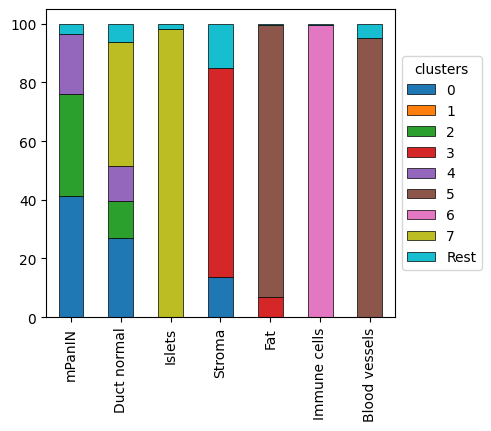

In [42]:
columns_to_plot = ["mPanIN", "Duct normal", "Islets", "Stroma", "Fat", "Immune cells", "Blood vessels"]
filtered_results = results.loc[columns_to_plot]

fig, ax = plt.subplots(1,1, figsize=(4.5, 4))
filtered_results.plot(kind="bar", stacked=True, ax=ax, edgecolor='black', linewidth=0.5, xlabel="", grid=False, color=([0.12156863, 0.46666667, 0.70588235, 1.        ],[1.         ,0.49803922 ,0.05490196 ,1.        ],[0.17254902, 0.62745098, 0.17254902, 1.        ],[0.83921569, 0.15294118, 0.15686275, 1.        ],[0.58039216, 0.40392157, 0.74117647, 1.        ],[0.54901961, 0.3372549 , 0.29411765, 1.        ] ,[0.89019608 ,0.46666667 ,0.76078431 ,1.        ],[0.7372549  ,0.74117647, 0.13333333 ,1.        ],[0.09019608, 0.74509804, 0.81176471, 1.        ],[0.68235294, 0.78039216, 0.90980392, 1.        ] ,[1.         ,0.73333333, 0.47058824 ,1.        ] ,[0.59607843, 0.8745098,  0.54117647, 1.        ], [1.        , 0.59607843, 0.58823529 ,1.        ],[0.77254902, 0.69019608, 0.83529412 ,1.        ] ,[0.76862745, 0.61176471, 0.58039216 ,1.        ],[0.96862745 ,0.71372549 ,0.82352941, 1.        ],[0.78039216 ,0.78039216 ,0.78039216 ,1.        ] ,[0.85882353, 0.85882353, 0.55294118, 1.        ], [0.61960784, 0.85490196 ,0.89803922 ,1.        ]))
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="clusters")
plt.savefig("./results_plot_harm_others.pdf", bbox_inches="tight")
plt.savefig("./results_plot_harm_others.tiff", bbox_inches="tight")
plt.show()

In [21]:
adata_cc926983 = adata_cc.obs[adata_cc.obs["dataset"] == "926983"]
adata_cc926983.index = adata_cc926983.index.str.replace('-926983', '')
adata_cc926983.to_csv("./cluster_harm_cloupe_926983.csv", columns=["clusters"])

In [22]:
adata_cc926987 = adata_cc.obs[adata_cc.obs["dataset"] == "926987"]
adata_cc926987.index = adata_cc926987.index.str.replace('-926987', '')
adata_cc926987.to_csv("./cluster_harm_cloupe_926987.csv", columns=["clusters"])

In [23]:
adata_cc926991 = adata_cc.obs[adata_cc.obs["dataset"] == "926991"]
adata_cc926991.index = adata_cc926991.index.str.replace('-926991', '')
adata_cc926991.to_csv("./cluster_harm_cloupe_926991.csv", columns=["clusters"])

In [24]:
adata_cc926895 = adata_cc.obs[adata_cc.obs["dataset"] == "926895"]
adata_cc926895.index = adata_cc926895.index.str.replace('-926895', '')
adata_cc926895.to_csv("./cluster_harm_cloupe_9268951.csv", columns=["clusters"])

In [25]:
adata_cc38032 = adata_cc.obs[adata_cc.obs["dataset"] == "38032"]
adata_cc38032.index = adata_cc38032.index.str.replace('-38032', '')
adata_cc38032.to_csv("./cluster_harm_cloupe_38032.csv", columns=["clusters"])

In [17]:
adata_cc=ad.read_h5ad("./results_harm.h5ad")

In [18]:
clusters_colors = dict(
    zip([str(i) for i in range(18)], adata_cc.uns["clusters_colors"])
)

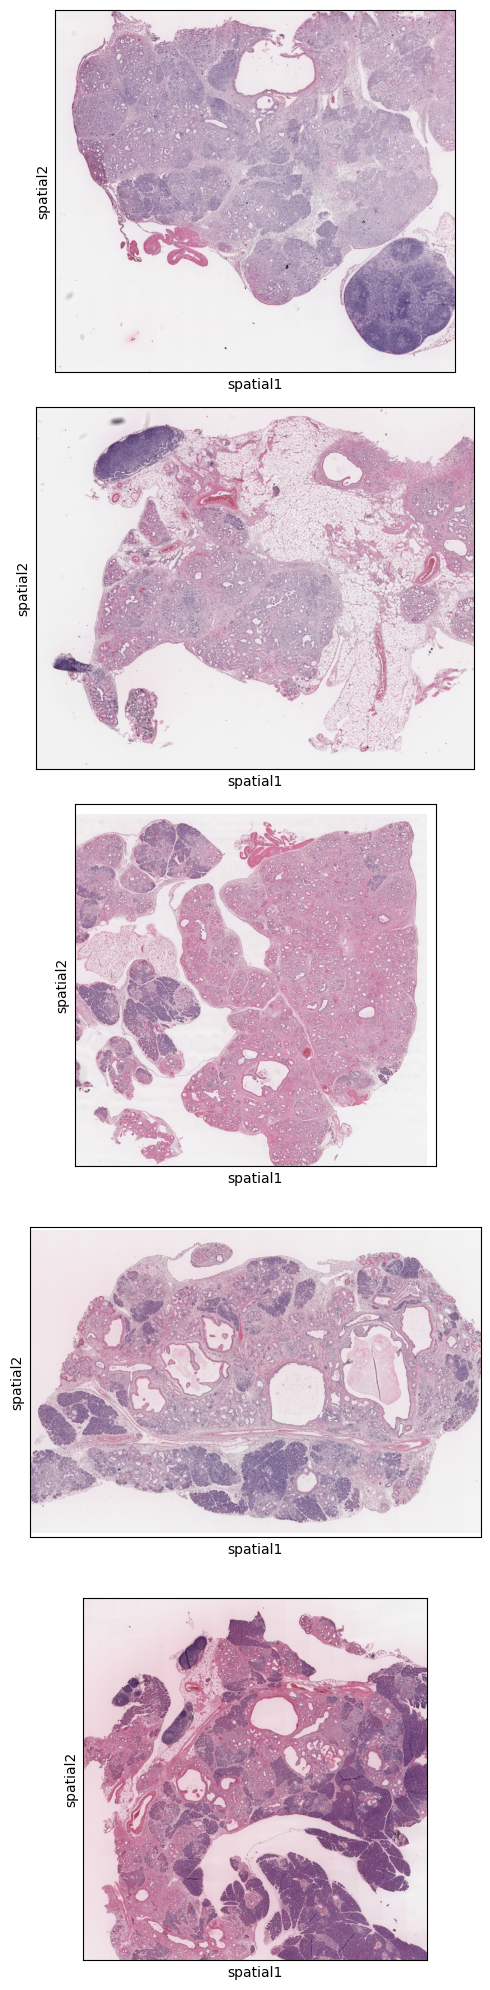

In [19]:
ncols = 1
nrows = 5 
fig, axs = plt.subplots(nrows, ncols, figsize=(5,20)) 

for i, library in enumerate(
    ["926983", "926987", "926991", "926895", "38032"]
):
    ad = adata_cc[adata_cc.obs.dataset == library].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=f"{library}_hires",
        size=1.5,
        palette=[
            v
            for k, v in clusters_colors.items()
            if k in ad.obs.clusters.unique().tolist()
        ],
        legend_loc='right margin',
        legend_fontsize="small",
        ax=axs[i],
        show=False,
    )

plt.tight_layout()
#plt.savefig("./spatial_HE.pdf", bbox_inches="tight")
#plt.savefig("./spatial_HE.tiff", bbox_inches="tight")
plt.show()

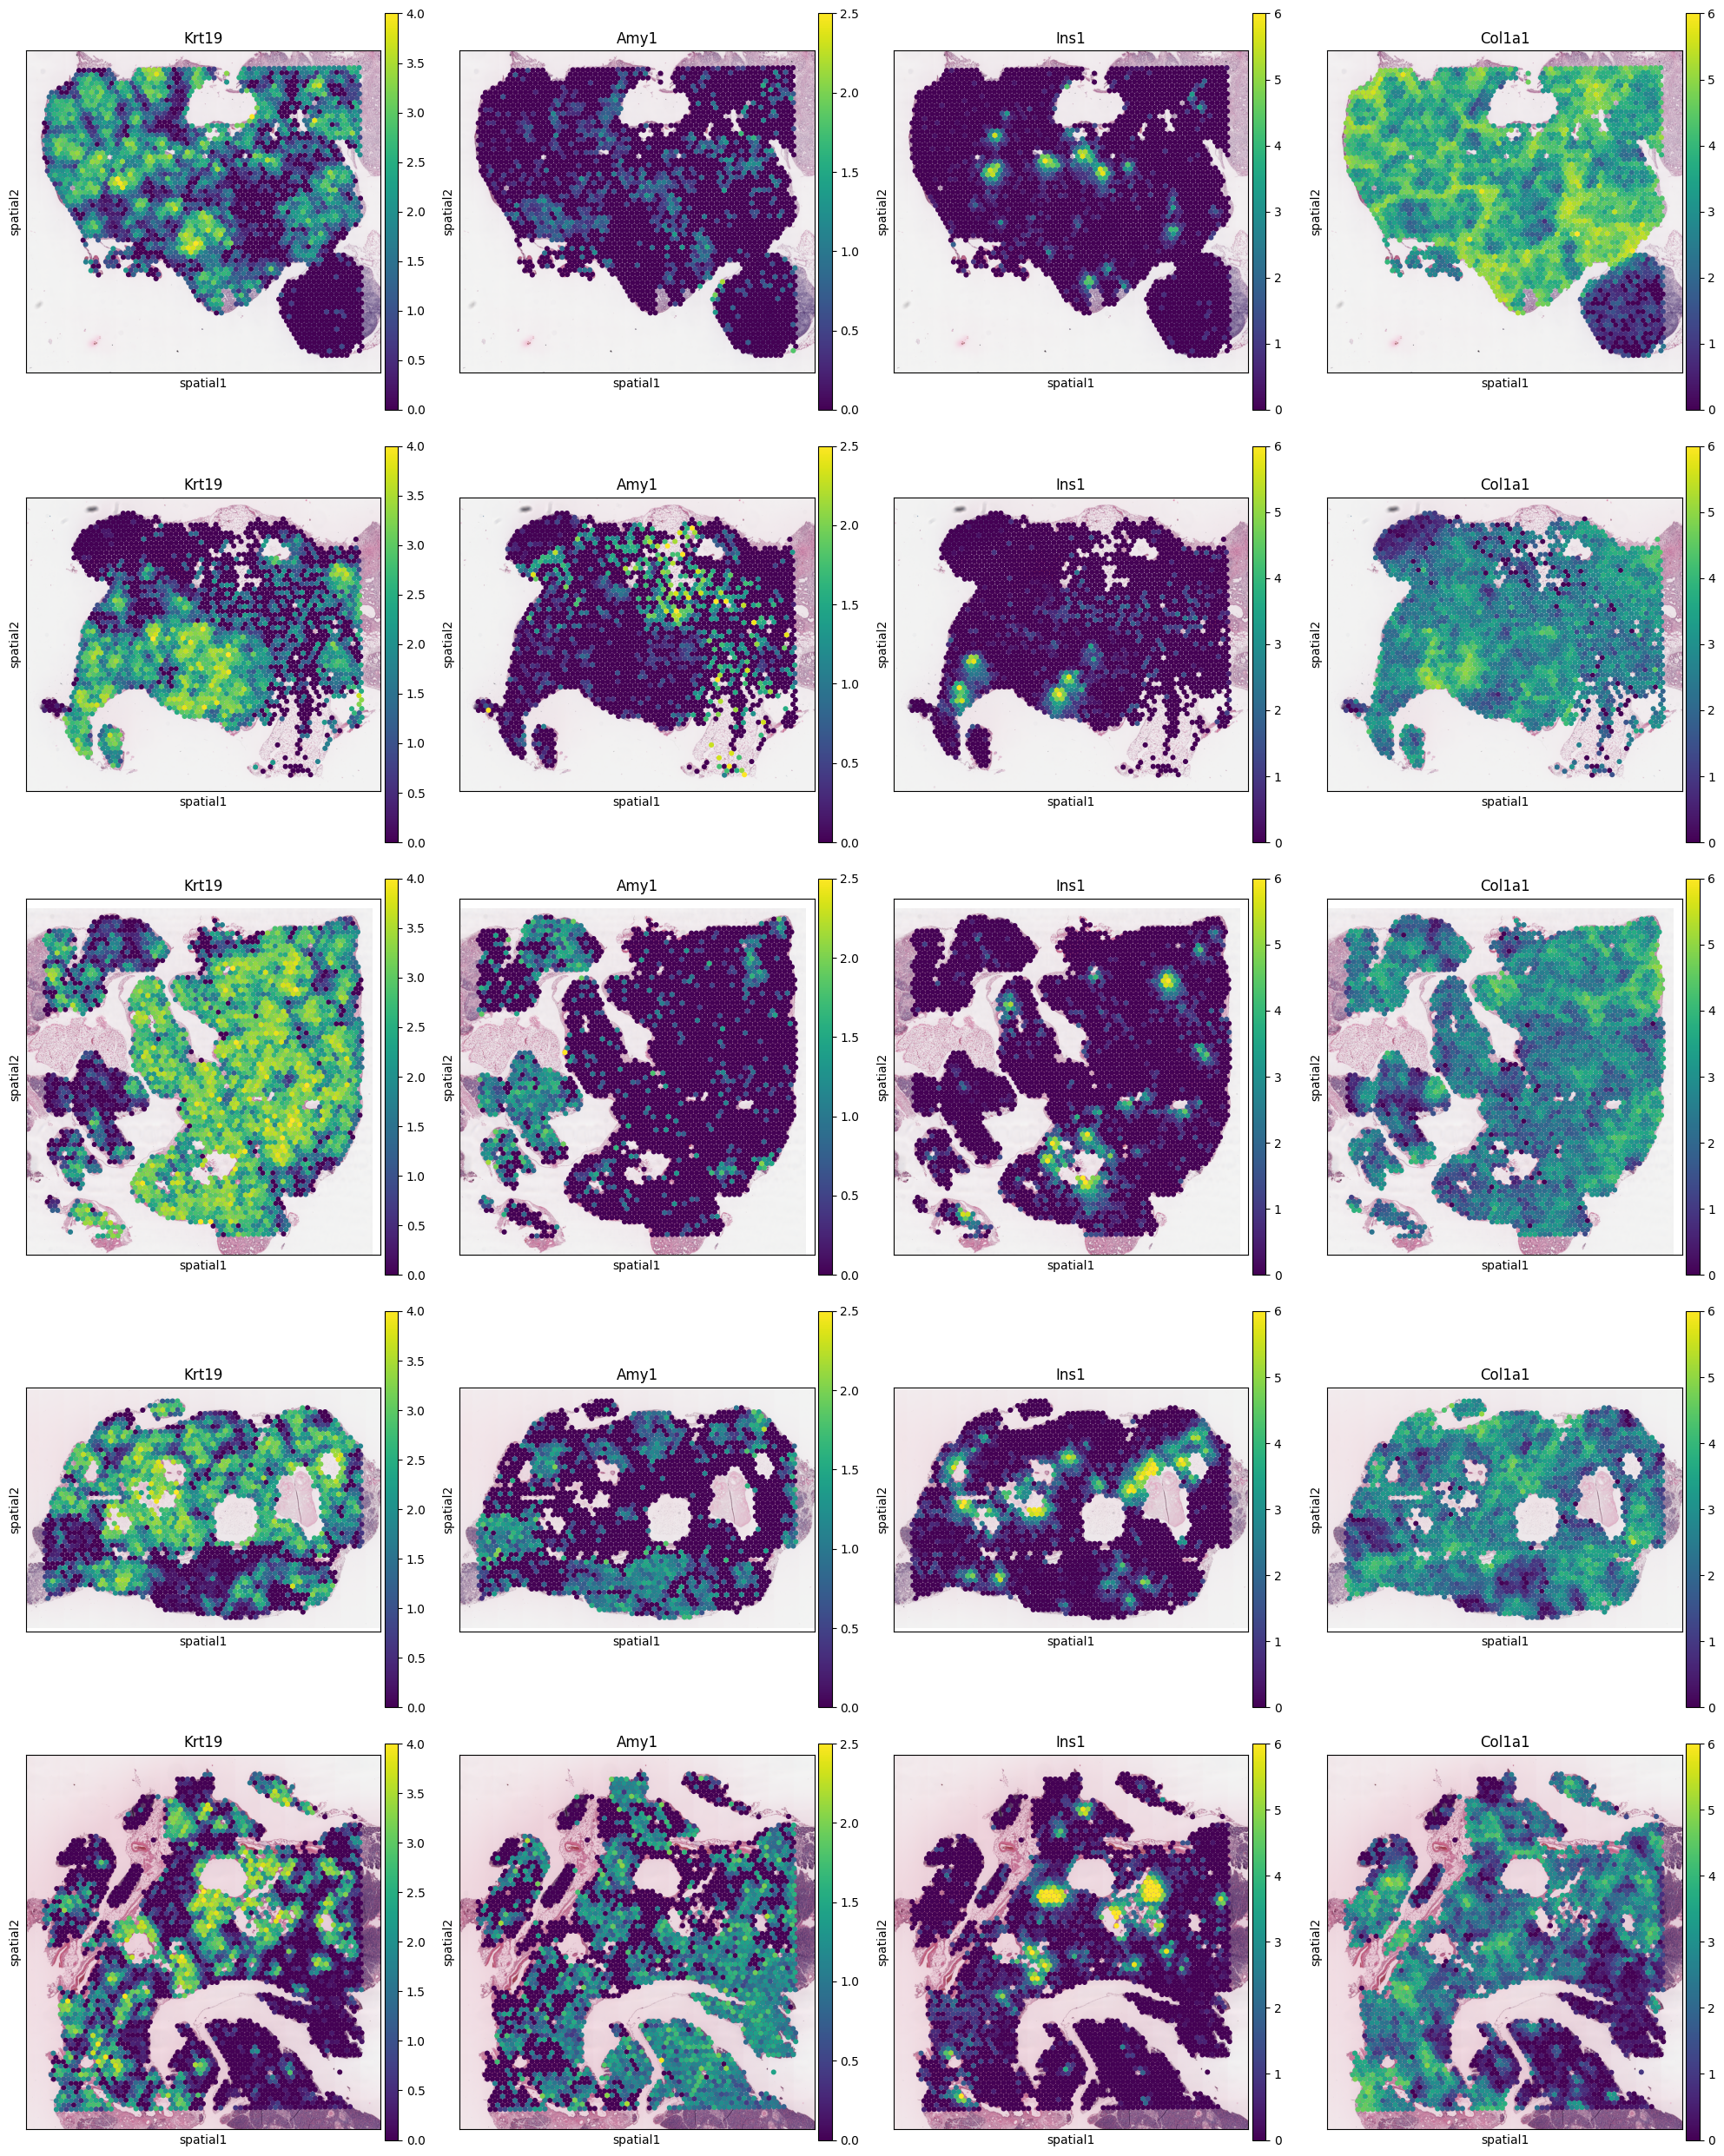

In [34]:
marker_ranges = {
    "Krt19": (0, 4),  
    "Amy1": (0, 2.5),
    "Ins1": (0, 6),
    "Col1a1": (0, 6)
}

ncols = 4 
nrows = 5 
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

for i, library in enumerate(["926983", "926987", "926991", "926895", "38032"]):
    ad = adata_cc[adata_cc.obs.dataset == library].copy()

    for j, marker in enumerate(["Krt19", "Amy1", "Ins1", "Col1a1"]):
        sc.pl.spatial(
            ad,
            img_key="hires",
            library_id=f"{library}_hires",
            color=marker,
            size=1.5,
            ax=axs[i, j],
            show=False,
            vmin=marker_ranges[marker][0],
            vmax=marker_ranges[marker][1]
        )

plt.tight_layout()
plt.savefig("./spatial_marker.pdf", bbox_inches="tight")
plt.savefig("./spatial_marker.tiff", bbox_inches="tight")
plt.show()